# Analysis of Molecular Variance

In [2]:
library(adegenet)
library(poppr)

In [9]:
infile <- "../inputfiles/bft.kinrm.gen"
bft <- read.genepop(infile, ncode = 3L, quiet = T)
metadata <- read.csv("../inputfiles/bft.kinrm.strata", sep = ",", header = T)
names(metadata) <- c("name", "year","ignore1", "ignore2","region","locality")

Add the proper strata into the `@other` slot in the Genind

In [11]:
strata(bft) <- metadata[,c(-3, -4)]
head(strata(bft))

,name,year,region,locality
,<fct>,<fct>,<fct>,<fct>
1,BRZ_1261,2016,BRZ,BRZ
2,BRZ_1269,2016,BRZ,BRZ
3,BRZ_1270,2016,BRZ,BRZ
4,BRZ_1271,2016,BRZ,BRZ
5,BRZ_1275,2016,BRZ,BRZ
6,BRZ_1276,2016,BRZ,BRZ


## Generate genetic distances

In [12]:
gen.dist <- dist(x = bft, method = "euclidean", diag=TRUE, upper=TRUE)
head(gen.dist)

[1] 22.55304 20.69386 21.76268 23.55004 23.52333 22.60060

## AMOVA year/locality

In [31]:
set.seed(6969)

In [29]:
amv.yr.loc <- poppr.amova(bft, hier = ~year/locality, dist = gen.dist, squared = TRUE, within = FALSE, quiet = T, cutoff = 0.1)
amv.yr.loc

$call
ade4::amova(samples = xtab, distances = xdist, structures = xstruct)

$results
                             Df     Sum Sq  Mean Sq
Between year                  3   35.84913 11.94971
Between samples Within year  10  119.71243 11.97124
Within samples              312 3488.81871 11.18211
Total                       325 3644.38027 11.21348

$componentsofcovariance
                                               Sigma            %
Variations  Between year                -0.002156536  -0.01922815
Variations  Between samples Within year  0.035563181   0.31708907
Variations  Within samples              11.182111264  99.70213908
Total variations                        11.215517909 100.00000000

$statphi
                            Phi
Phi-samples-total  0.0029786092
Phi-samples-year   0.0031702811
Phi-year-total    -0.0001922815


### Test for significance

In [32]:
signif.yr.loc <- randtest(amv.yr.loc, nrepet = 999)
signif.yr.loc

class: krandtest lightkrandtest 
Monte-Carlo tests
Call: randtest.amova(xtest = amv.yr.loc, nrepet = 999)

Number of tests:   3 

Adjustment method for multiple comparisons:   none 
Permutation number:   999 
                        Test          Obs    Std.Obs   Alter Pvalue
1  Variations within samples 11.182111264 -7.2599402    less  0.001
2 Variations between samples  0.035563181  6.2238183 greater  0.001
3    Variations between year -0.002156536 -0.2616156 greater  0.554


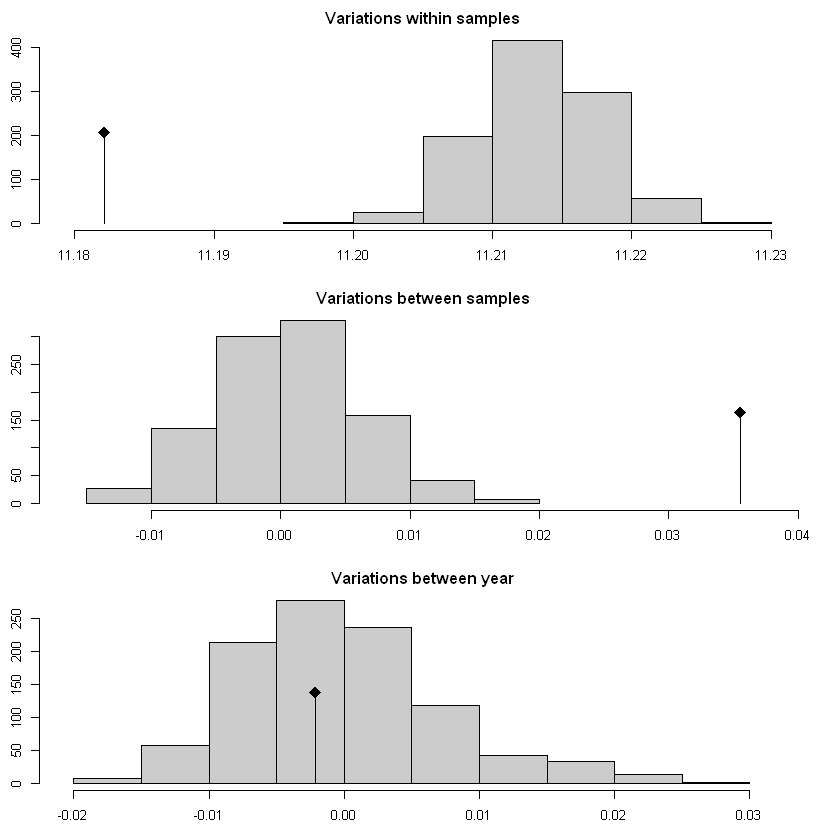

In [28]:
plot(signif.yr.loc)

## AMOVA year/region

In [30]:
amv.yr.reg <- poppr.amova(bft, hier = ~year/region, dist = gen.dist, squared = TRUE, within = FALSE, quiet = T, cutoff = 0.1)
amv.yr.reg

$call
ade4::amova(samples = xtab, distances = xdist, structures = xstruct)

$results
                             Df     Sum Sq  Mean Sq
Between year                  3   35.84913 11.94971
Between samples Within year   6   72.00899 12.00150
Within samples              316 3536.52215 11.19153
Total                       325 3644.38027 11.21348

$componentsofcovariance
                                               Sigma            %
Variations  Between year                -0.002121116  -0.01891087
Variations  Between samples Within year  0.026983384   0.24057106
Variations  Within samples              11.191525804  99.77833981
Total variations                        11.216388071 100.00000000

$statphi
                            Phi
Phi-samples-total  0.0022166019
Phi-samples-year   0.0024052558
Phi-year-total    -0.0001891087


### Test for signficance

In [33]:
signif.yr.reg <- randtest(amv.yr.reg, nrepet = 999)
signif.yr.reg

class: krandtest lightkrandtest 
Monte-Carlo tests
Call: randtest.amova(xtest = amv.yr.reg, nrepet = 999)

Number of tests:   3 

Adjustment method for multiple comparisons:   none 
Permutation number:   999 
                        Test          Obs   Std.Obs   Alter Pvalue
1  Variations within samples 11.191525804 -6.068112    less  0.001
2 Variations between samples  0.026983384  4.860602 greater  0.001
3    Variations between year -0.002121116  0.107475 greater  0.379


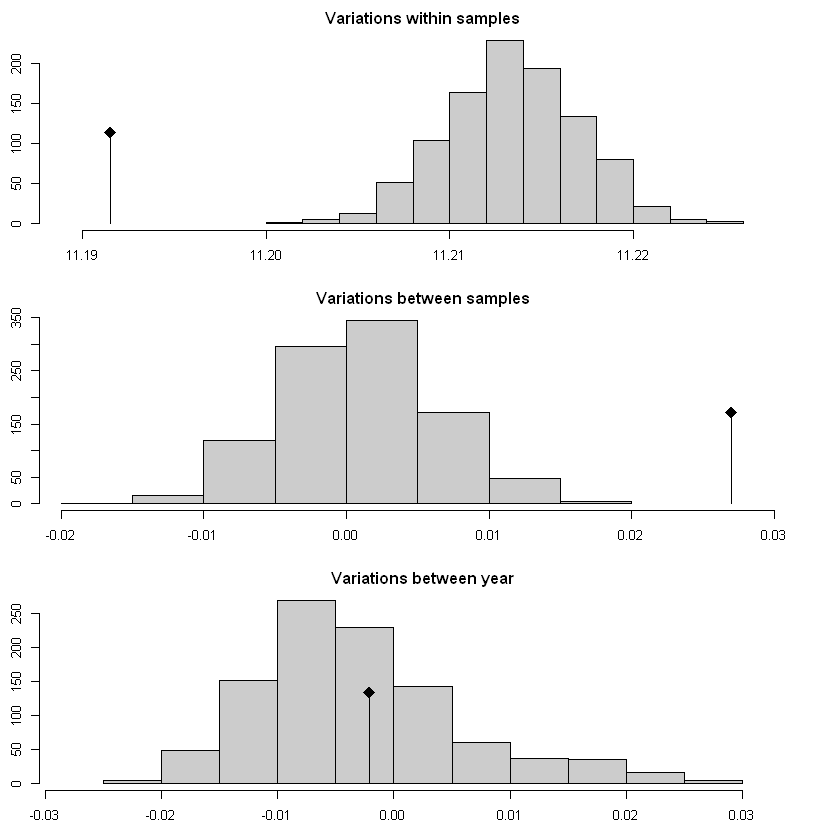

In [34]:
plot(signif.yr.reg)

## AMOVA locality/year/region

In [38]:
amv.loc.yr.reg <- poppr.amova(bft, hier = ~region/year/locality, dist = gen.dist, squared = TRUE, within = FALSE, quiet = T, cutoff = 0.1)
amv.loc.yr.reg

$call
ade4::amova(samples = xtab, distances = xdist, structures = xstruct)

$results
                             Df     Sum Sq  Mean Sq
Between region                3   34.91572 11.63857
Between year Within region    6   72.94240 12.15707
Between samples Within year   4   47.70344 11.92586
Within samples              312 3488.81871 11.18211
Total                       325 3644.38027 11.21348

$componentsofcovariance
                                               Sigma            %
Variations  Between region              -0.008397013  -0.07487514
Variations  Between year Within region   0.009099021   0.08113486
Variations  Between samples Within year  0.031874179   0.28421816
Variations  Within samples              11.182111264  99.70952212
Total variations                        11.214687450 100.00000000

$statphi
                            Phi
Phi-samples-total  0.0029047788
Phi-samples-year   0.0028423596
Phi-year-region    0.0008107415
Phi-region-total  -0.0007487514


### Test for significance

In [39]:
signif.loc.yr.reg <- randtest(amv.loc.yr.reg, nrepet = 999)
signif.loc.yr.reg

class: krandtest lightkrandtest 
Monte-Carlo tests
Call: randtest.amova(xtest = amv.loc.yr.reg, nrepet = 999)

Number of tests:   4 

Adjustment method for multiple comparisons:   none 
Permutation number:   999 
                        Test          Obs    Std.Obs   Alter Pvalue
1  Variations within samples 11.182111264 -7.3681892    less  0.001
2 Variations between samples  0.031874179  3.9563642 greater  0.001
3    Variations between year  0.009099021  0.4016072 greater  0.382
4  Variations between region -0.008397013 -1.2580347 greater  0.906


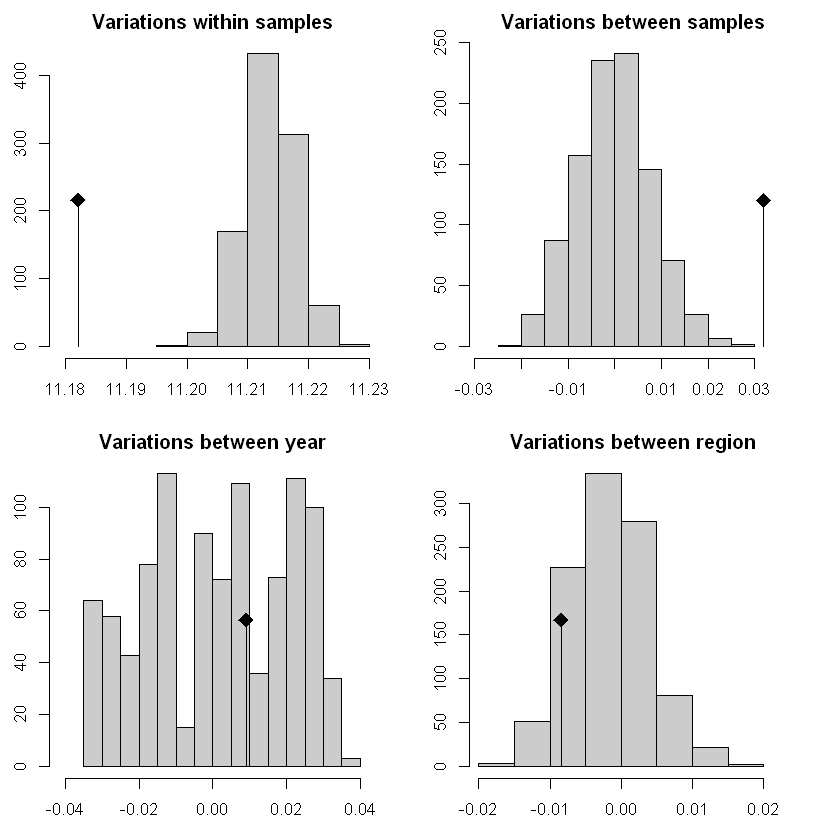

In [40]:
plot(signif.loc.yr.reg)